In [1]:
from ROOT import TH1F, TCanvas, TF1, gStyle

Welcome to JupyROOT 6.18/04


In [2]:
import numpy as np

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
test_data = np.load("/Users/cdesio/Downloads/Predicted_2_4_10_25_ALL_out_model_trained_on_npz.npz")

In [5]:
data_15mm = np.load("/Users/cdesio/Downloads/Predicted_15mm_ALL_out_model_trained_on_npz.npz")

In [6]:
test_ALLdata = np.load("/Users/cdesio/Downloads/Predicted_ALL_DATA_model_trained_on_npz.npz")

In [7]:
y_true_testdata = test_data["true"]
y_pred_testdata = test_data["pred"]

In [8]:
y_true_15mm = data_15mm['true']
y_pred_15mm = data_15mm['pred']

In [9]:
y_true_alldata = test_ALLdata["true"]
y_pred_alldata = test_ALLdata["pred"]

In [6]:
def gaus_fit(data_file, keyword, n_bins = 10, histo_min = -1.0, histo_max = 1.0, key="test"):
    data = np.load(data_file)
    true = data['true']
    preds = data['pred']

    mean = np.mean(true-preds)
    histo = TH1F("data_{}".format(keyword),"Distribution of prediction errors for r-UNet estimations", 
                 n_bins,histo_min,histo_max)
    for i in (true-preds):
        histo.Fill(i)
    
    canvas = TCanvas()
    f = TF1("f","gaus")
    f.FixParameter(1,mean)

    histo.Fit(f, "S")
    histo.GetXaxis().SetTitle("prediction error (mm)");
    yax=histo.GetYaxis()
    yax.SetLimits(0,500)
    #histo.SetAxisRange(0, 500,"y")
    gStyle.SetOptStat(0)
    #gStyle.SetOptFit(1111)
    #gStyle.SetStatY(0.9);
    #gStyle.SetStatX(0.9);
    #gStyle.SetStatW(0.4);
    #gStyle.SetStatH(0.5)
    histo.Draw()
    canvas.Draw()
    canvas.SaveAs("plot.png")
    return histo, canvas

In [11]:
def no_fit(y_preds, y_true, keyword, n_bins = 10, histo_min = -1.0, histo_max = 1.0, key="test"):
    true = y_true
    preds = y_preds

    mean = np.mean(true-preds)
    histo = TH1F("data_{}".format(keyword),"Distribution of prediction errors for r-UNet estimations", 
                 n_bins,histo_min,histo_max)
    for i in (true-preds):
        histo.Fill(i)
    
    canvas = TCanvas()
    #f = TF1("f","gaus")
    #f.FixParameter(1,mean)

    #histo.Fit(f, "S")
    
    yax=histo.GetYaxis()
    yax.SetLimits(0,500)
    #histo.SetAxisRange(0, 500,"y")
    histo.Draw()
    canvas.Draw()
    return histo, canvas

 FCN=207.767 FROM MIGRAD    STATUS=CONVERGED      44 CALLS          45 TOTAL
                     EDM=1.86649e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.02001e+02   2.80457e+00   1.53692e-02  -8.19255e-07
   2  Mean         1.02278e-01     fixed    
   3  Sigma        1.43119e-01   2.50166e-03   2.98644e-05  -4.01328e-04


Info in <TCanvas::Print>: png file plot.png has been created


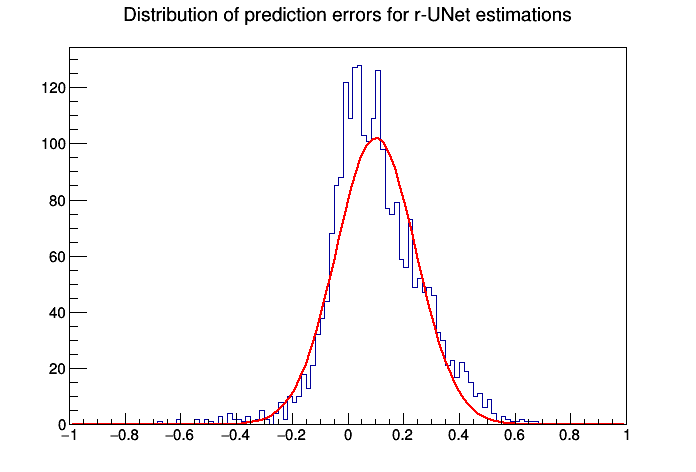

In [12]:
histo_test, canvas_test = gaus_fit(y_pred_testdata, 
                                   y_true_testdata, 
                                   n_bins = 120,
                                   keyword =  "test")

 FCN=26.1095 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=1.46734e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.85395e+01   3.63128e+00   7.61323e-03   1.46240e-04
   2  Mean        -4.03083e-01     fixed    
   3  Sigma        9.86874e-02   2.34029e-03   1.62271e-05  -2.39259e-03


Warning in <TROOT::Append>: Replacing existing TH1: data_15mm (Potential memory leak).
Info in <TCanvas::Print>: png file plot.png has been created


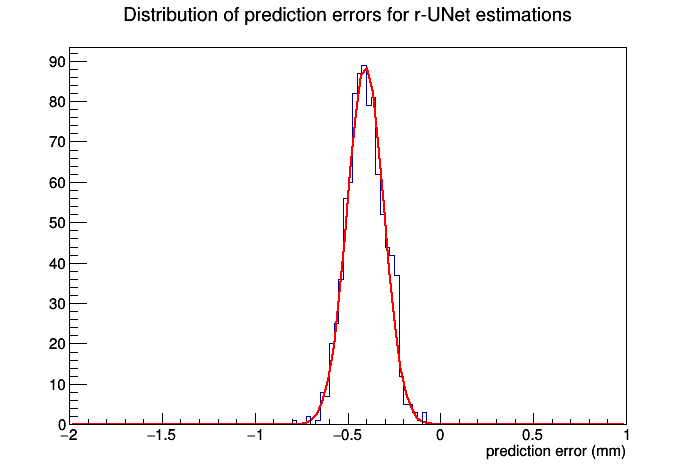

In [26]:
histo_15mm, canvas_15mm = gaus_fit(y_pred_15mm, 
                                   y_true_15mm, 
                                   n_bins = 120,
                                   keyword =  "15mm",
                                  histo_min = -2.0,
                                  histo_max = 1.0)

 FCN=3950.44 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=5.3255e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.60228e+02   1.08682e+01   2.63154e-01   6.63828e-07
   2  Mean         1.55640e-01     fixed    
   3  Sigma        1.66563e-01   2.42123e-03   4.85271e-05  -1.38221e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_test (Potential memory leak).


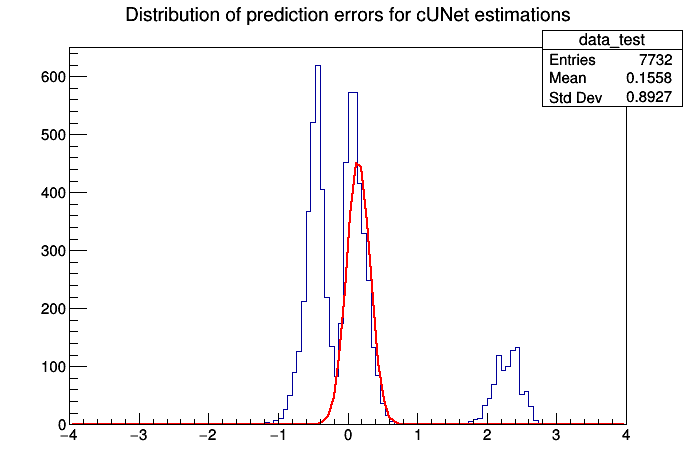

In [31]:
histo_alldata, canvas_test_alldata = gaus_fit(y_pred_alldata, 
                                   y_true_alldata, 
                                   n_bins = 120,
                                   keyword =  "test",
                                   histo_min = -4.0,
                                   histo_max = 4.0)

Warning in <TROOT::Append>: Replacing existing TH1: data_test (Potential memory leak).


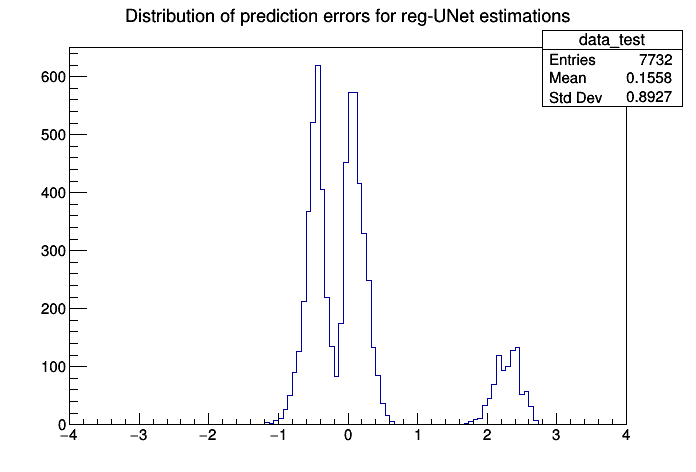

In [38]:
histo_alldata, canvas_test_alldata = no_fit(y_pred_alldata, 
                                   y_true_alldata, 
                                   n_bins = 120,
                                   keyword =  "test",
                                   histo_min = -4.0,
                                   histo_max = 4.0)

In [9]:
def get_idx(arr, key):
    return np.where(arr==key)[0]

def idx_mse(dist, true_arr = y_true_alldata, preds_arr = y_pred_alldata):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse 

In [10]:
distances = [1,2,3,4,10,15,20,25,30,35]
errors = [idx_mse(i)[1] for i in distances]

1 0.24235138049223132
2 0.013670774777158789
3 0.0530128177636608
4 0.016859874870366696
10 0.07876675832976161
15 0.1727079761139339
20 0.37516064459066306
25 0.03669064371362765
30 5.297429456623269
35 30.827486249912546


In [11]:
idxs = [idx_mse(i)[0] for i in distances]

1 0.24235138049223132
2 0.013670774777158789
3 0.0530128177636608
4 0.016859874870366696
10 0.07876675832976161
15 0.1727079761139339
20 0.37516064459066306
25 0.03669064371362765
30 5.297429456623269
35 30.827486249912546


In [44]:
y_1mm_true = y_true_alldata[idxs[0]]
y_1mm_pred = y_pred_alldata[idxs[0]]

 FCN=54.1324 FROM MIGRAD    STATUS=CONVERGED      43 CALLS          44 TOTAL
                     EDM=9.14693e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.96918e+01   2.89930e+00   8.68784e-03   2.51904e-06
   2  Mean        -4.84296e-01     fixed    
   3  Sigma        8.10083e-02   1.95911e-03   2.31374e-05  -1.03508e-03


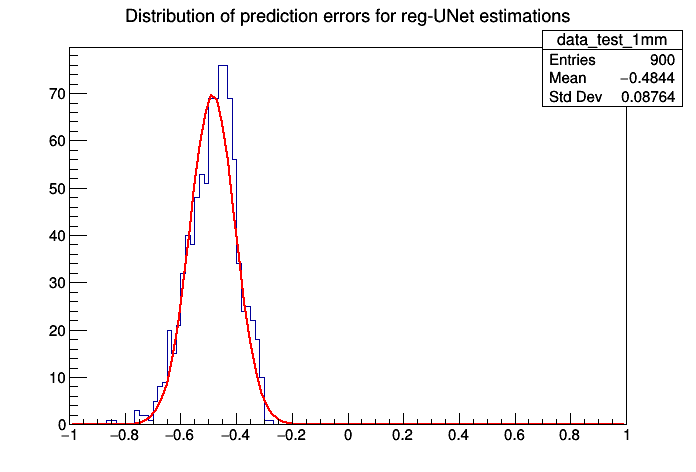

In [46]:
histo_1mm, canvas_test_1mm = gaus_fit(y_1mm_pred, 
                                   y_1mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_1mm",
                                   histo_min = -1.0,
                                   histo_max = 1.0)

 FCN=37.0885 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=8.56227e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.15971e+01   2.15677e+00   5.29197e-03   5.61764e-04
   2  Mean         7.27500e-02     fixed    
   3  Sigma        9.07981e-02   2.91361e-03   2.62957e-05  -1.46200e-02


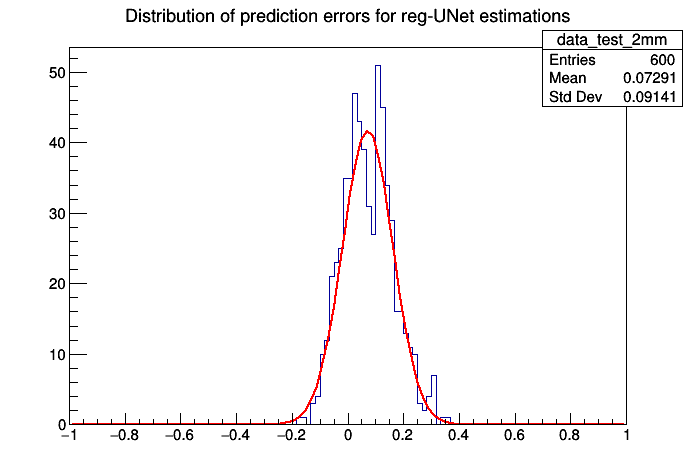

In [48]:
y_2mm_true = y_true_alldata[idxs[1]]
y_2mm_pred = y_pred_alldata[idxs[1]]

histo_3mm, canvas_test_3mm = gaus_fit(y_2mm_pred, 
                                   y_2mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_2mm",
                                   histo_min = -1.0,
                                   histo_max = 1.0)

 FCN=149.398 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=1.02269e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.13664e+01   1.67635e+00   7.18920e-03   3.70329e-05
   2  Mean         9.71554e-02     fixed    
   3  Sigma        1.44733e-01   5.41259e-03   4.37859e-05   5.05606e-03


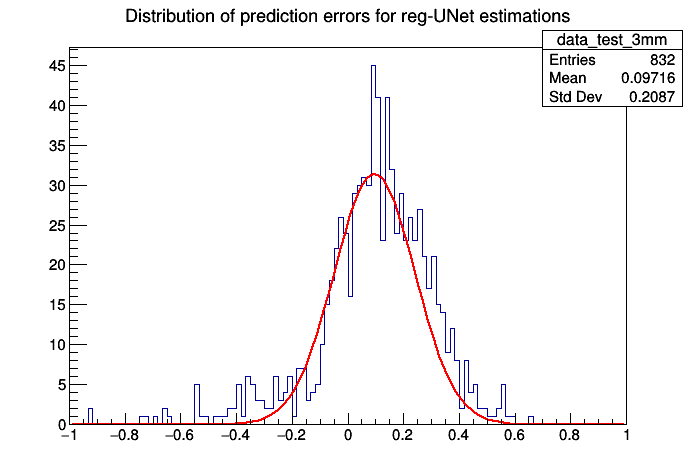

In [12]:
y_3mm_true = y_true_alldata[idxs[2]]
y_3mm_pred = y_pred_alldata[idxs[2]]

histo_3mm, canvas_test_3mm = gaus_fit(y_3mm_pred, 
                                   y_3mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_3mm",
                                   histo_min = -1.0,
                                   histo_max = 1.0)

 FCN=140.283 FROM MIGRAD    STATUS=CONVERGED      47 CALLS          48 TOTAL
                     EDM=4.82761e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.70319e+01   2.29850e+00   9.99152e-03  -4.90836e-04
   2  Mean        -1.41111e-02     fixed    
   3  Sigma        8.29675e-02   3.52398e-03   4.85725e-05  -1.11542e-01


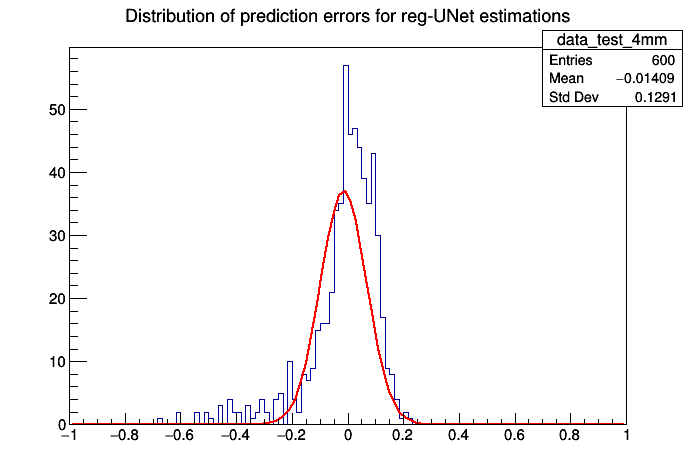

In [13]:
y_4mm_true = y_true_alldata[idxs[3]]
y_4mm_pred = y_pred_alldata[idxs[3]]

histo_4mm, canvas_test_4mm = gaus_fit(y_4mm_pred, 
                                   y_4mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_4mm",
                                   histo_min = -1.0,
                                   histo_max = 1.0)

 FCN=33.1789 FROM MIGRAD    STATUS=CONVERGED      41 CALLS          42 TOTAL
                     EDM=2.01058e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.67098e+01   1.39934e+00   3.20288e-03   9.51302e-05
   2  Mean         2.42778e-01     fixed    
   3  Sigma        1.43758e-01   5.02525e-03   2.69336e-05  -7.66430e-03


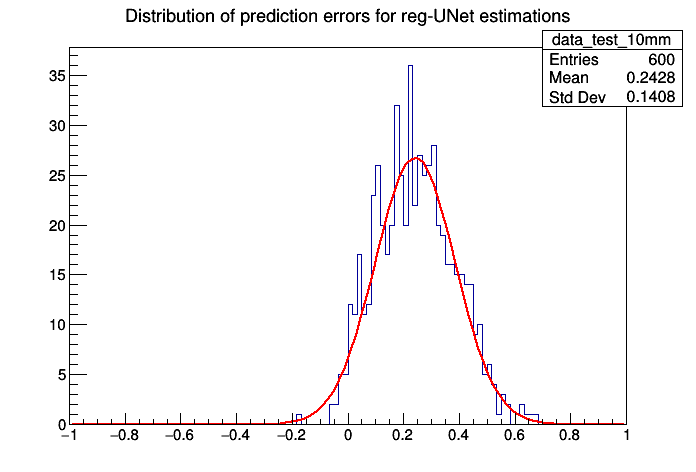

In [14]:
y_10mm_true = y_true_alldata[idxs[4]]
y_10mm_pred = y_pred_alldata[idxs[4]]

histo_10mm, canvas_test_10mm = gaus_fit(y_10mm_pred, 
                                   y_10mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_10mm",
                                   histo_min = -1.0,
                                   histo_max = 1.0)

 FCN=21.3615 FROM MIGRAD    STATUS=CONVERGED      38 CALLS          39 TOTAL
                     EDM=2.18713e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.81368e+01   2.40660e+00   4.52840e-03   2.01077e-06
   2  Mean        -4.02981e-01     fixed    
   3  Sigma        1.01004e-01   2.51487e-03   1.54856e-05  -3.04350e-04


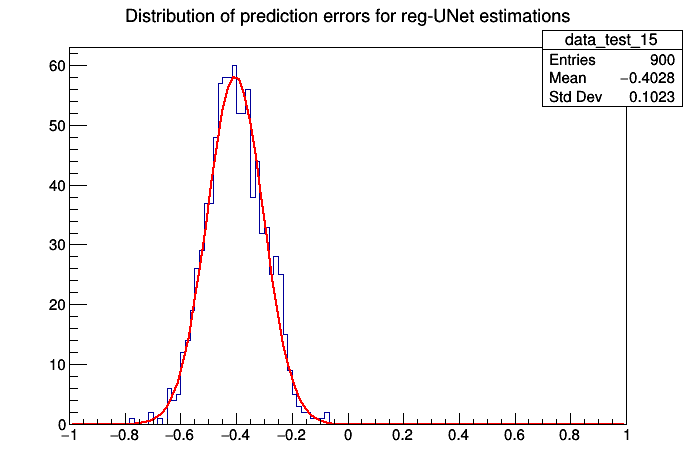

In [15]:
y_15mm_true = y_true_alldata[idxs[5]]
y_15mm_pred = y_pred_alldata[idxs[5]]

histo_15mm, canvas_test_15mm = gaus_fit(y_15mm_pred, 
                                   y_15mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_15",
                                   histo_min = -1.0,
                                   histo_max = 1.0)

 FCN=29.6548 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=2.10147e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.85119e+01   2.85162e+00   6.27665e-03   5.07977e-05
   2  Mean        -5.87222e-01     fixed    
   3  Sigma        1.69290e-01   4.17169e-03   1.76481e-05  -1.04193e-02


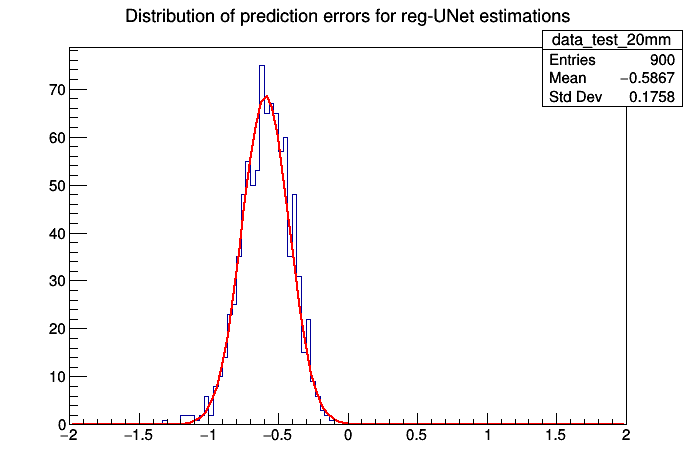

In [16]:
y_20mm_true = y_true_alldata[idxs[6]]
y_20mm_pred = y_pred_alldata[idxs[6]]

histo_20mm, canvas_test_20mm = gaus_fit(y_20mm_pred, 
                                   y_20mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_20mm",
                                   histo_min = -2.0,
                                   histo_max = 2.0)

 FCN=60.3483 FROM MIGRAD    STATUS=CONVERGED      40 CALLS          41 TOTAL
                     EDM=1.53198e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.25499e+01   1.16896e+00   3.71256e-03   8.38364e-05
   2  Mean         1.07694e-01     fixed    
   3  Sigma        1.62992e-01   5.37972e-03   3.54244e-05  -8.99762e-03


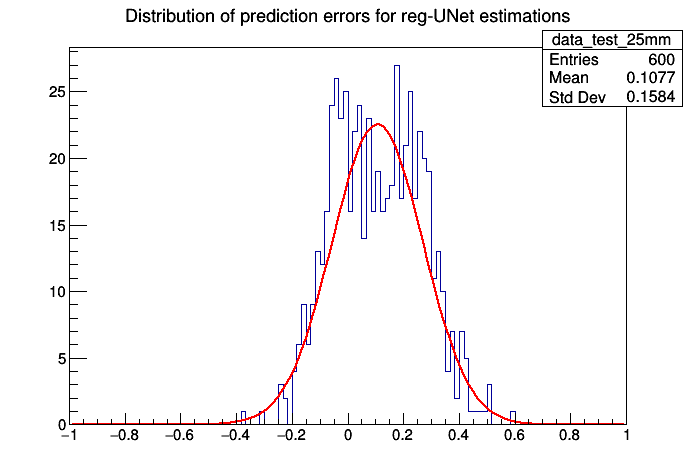

In [17]:
y_25mm_true = y_true_alldata[idxs[7]]
y_25mm_pred = y_pred_alldata[idxs[7]]

histo_25mm, canvas_test_25mm = gaus_fit(y_25mm_pred, 
                                   y_25mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_25mm",
                                   histo_min = -1.0,
                                   histo_max = 1.0)

 FCN=51.0744 FROM MIGRAD    STATUS=CONVERGED      40 CALLS          41 TOTAL
                     EDM=4.03537e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.85813e+01   3.78271e+00   1.07124e-02  -9.16907e-07
   2  Mean         2.29439e+00     fixed    
   3  Sigma        1.92970e-01   5.23167e-03   2.58370e-05  -1.16224e-03


Warning in <TROOT::Append>: Replacing existing TH1: data_test_30mm (Potential memory leak).


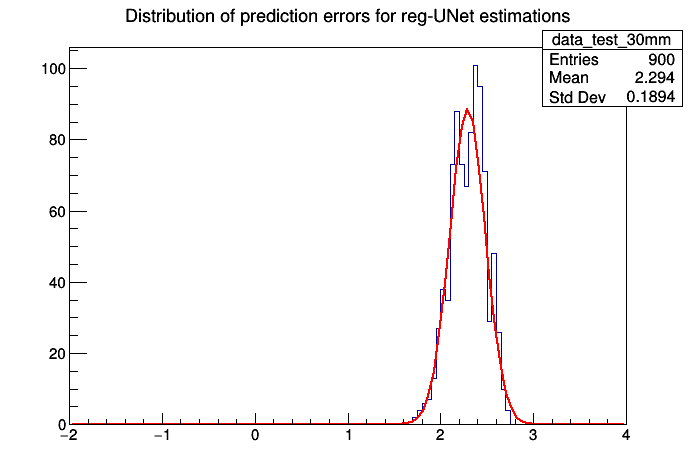

In [19]:
y_30mm_true = y_true_alldata[idxs[8]]
y_30mm_pred = y_pred_alldata[idxs[8]]

histo_30mm, canvas_test_30mm = gaus_fit(y_30mm_pred, 
                                   y_30mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_30mm",
                                   histo_min = -2.0,
                                   histo_max = 4.0)

 FCN=93.8384 FROM MIGRAD    STATUS=CONVERGED      47 CALLS          48 TOTAL
                     EDM=4.39151e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.69168e+01   2.07578e+00   7.85728e-03   3.48538e-06
   2  Mean         5.54826e+00     fixed    
   3  Sigma        2.33354e-01   7.06578e-03   3.93654e-05  -2.89855e-04


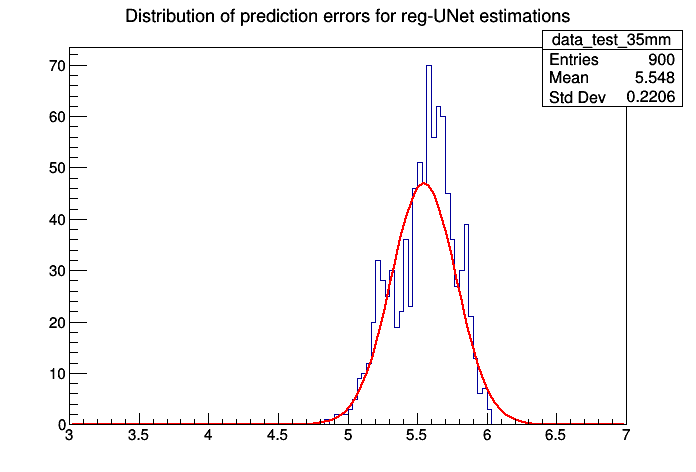

In [20]:
y_35mm_true = y_true_alldata[idxs[9]]
y_35mm_pred = y_pred_alldata[idxs[9]]

histo_35mm, canvas_test_35mm = gaus_fit(y_35mm_pred, 
                                   y_35mm_true, 
                                   n_bins = 120,
                                   keyword =  "test_35mm",
                                   histo_min = 3.0,
                                   histo_max = 7.0)

In [14]:
test_data_small = np.load("/Users/cdesio/Downloads/Predicted_npz_testdata_model_trained_on_npz.npz")

In [15]:
y_true_testdata_small = test_data_small["true"].ravel()
y_pred_testdata_small = test_data_small["pred"]

 FCN=46.5948 FROM MIGRAD    STATUS=CONVERGED      37 CALLS          38 TOTAL
                     EDM=3.86881e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.30919e+01   1.36025e+00   3.17328e-03  -2.71543e-04
   2  Mean         6.97222e-02     fixed    
   3  Sigma        9.88456e-02   7.78018e-03   5.60027e-05  -1.56605e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_test_ (Potential memory leak).
Info in <TCanvas::Print>: png file plot.png has been created


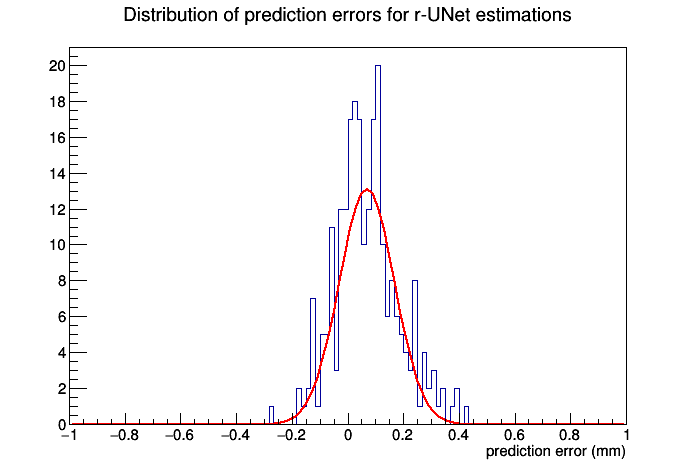

In [27]:
histo_test_small, canvas_test_small = gaus_fit(y_pred_testdata_small, 
                                   y_true_testdata_small, 
                                   n_bins = 120,
                                   keyword =  "test_",
                                   histo_min = -1.0,
                                   histo_max = 1.0)

In [24]:
data_6_positions = "../saved_models/trained_6positions/predicted_unseen_6positions_50epochs_0.7coeff.npz"

 FCN=629.101 FROM MIGRAD    STATUS=CONVERGED      50 CALLS          51 TOTAL
                     EDM=8.48524e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.28352e+02   2.80312e+00   2.91994e-02   1.21593e-06
   2  Mean        -2.65223e-01     fixed    
   3  Sigma        1.51535e-01   1.83883e-03   3.80981e-05   1.29206e-03


Warning in <TROOT::Append>: Replacing existing TH1: data_test_ (Potential memory leak).
Info in <TCanvas::Print>: png file plot.png has been created


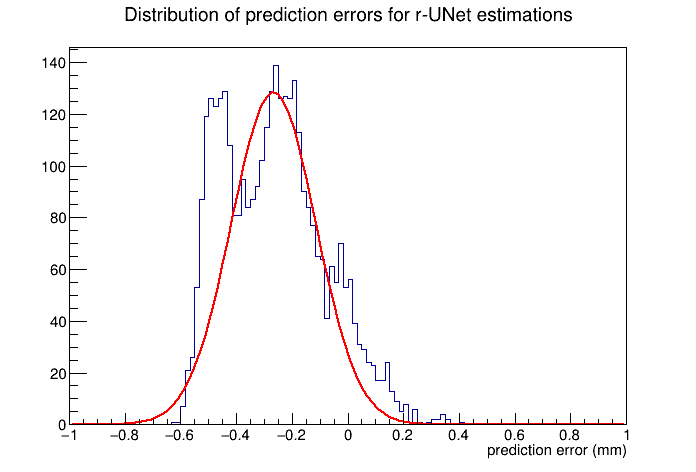

In [25]:
histo_test_small, canvas_test_small = gaus_fit(data_6_positions, 
                                   n_bins = 120,
                                   keyword =  "test_",
                                   histo_min = -1.0,
                                   histo_max = 1.0)